### Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re

warnings.filterwarnings('ignore')

In [2]:
df_brand = pd.read_csv('brands.csv')
df_rec_items = pd.read_csv('receipt_items.csv')
df_rec = pd.read_csv('receipts.csv')
df_users = pd.read_csv('users.csv')

## 1. ER Diagram for given Entities

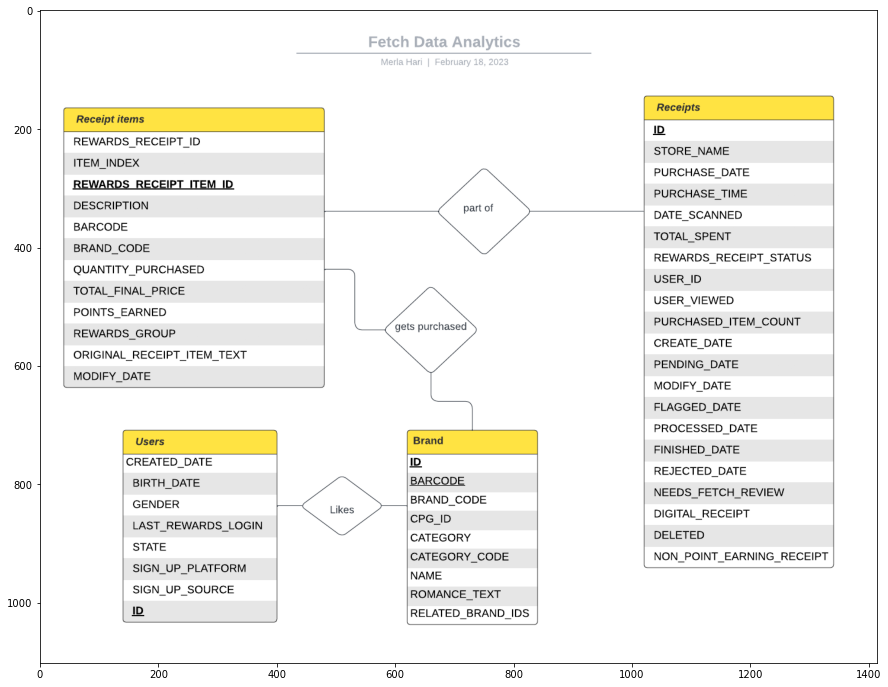

In [3]:
plt.figure(figsize=(18, 12))
image = plt.imread('Fetch Data Analytics.png')
plt.imshow(image)
plt.show()

Primary Keys are Underlined and bolded in above diagram
### Primary Keys:
    Brand : ID 
    Users: ID
    Receipts: ID
    Receipts items: REWARDS_RECEIPT_ITEM_ID
    
### Foreign Keys:
    Brand: 
    User: 
    Receipts: User id, 
    Receipt items: REWARDS_RECEIPT_ID


## 2. SQL queries for Business Stakeholder questions

1. select ri.BRAND_CODE,sum(ri.TOTAL_FINAL_PRICE) from receipt_items ri left join receipts r on ri.REWARDS_RECEIPT_ID = r.ID where r.FINISHED_DATE like '____-06%' and ri.BRAND_CODE!='' group by BRAND_CODE order by sum(TOTAL_FINAL_PRICE) desc limit 10;

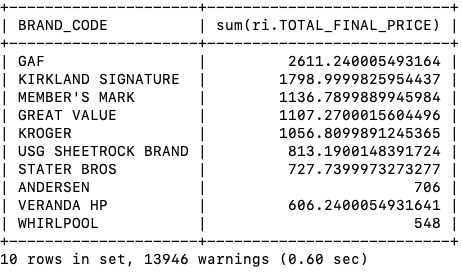

choosing FINISHED_DATE column for choosing August month and there is no user name in given table

2. select user_id, sum(TOTAL_SPENT) from receipts where FINISHED_DATE like '____-08%' group by user_id order by sum(TOTAL_SPENT) desc limit 5; 

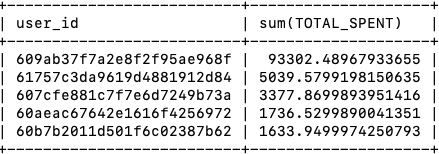

Assuming TOTAL_FINAL_PRICE as price of each item
dividing TOTAL_FINAL_PRICE with QUANTITY_PURCHASED to get price for one item
Since there is no user name present in given tables, just printing user_id

3. select r.user_id, ri.REWARDS_RECEIPT_ID, ri.TOTAL_FINAL_PRICE/ri.QUANTITY_PURCHASED from receipt_items ri inner join receipts r on ri.REWARDS_RECEIPT_ID=r.ID order by ri.TOTAL_FINAL_PRICE/ri.QUANTITY_PURCHASED desc limit 1;

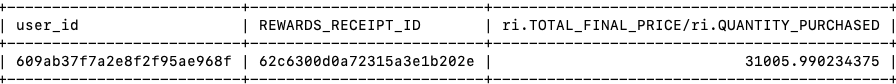

4. select ri.brand_code, ri.TOTAL_FINAL_PRICE/ri.QUANTITY_PURCHASED from receipt_items ri inner join receipts r on ri.REWARDS_RECEIPT_ID=r.ID order by ri.TOTAL_FINAL_PRICE/ri.QUANTITY_PURCHASED desc limit 1;

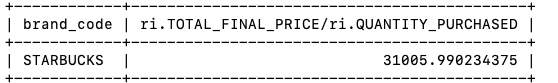

In receipt items table there are 3 years. printing each month in each year

5. select count(user_id), month(date_scanned), year(date_scanned) from receipts group by year(date_scanned),month(date_scanned) order by year(date_scanned),month(date_scanned);

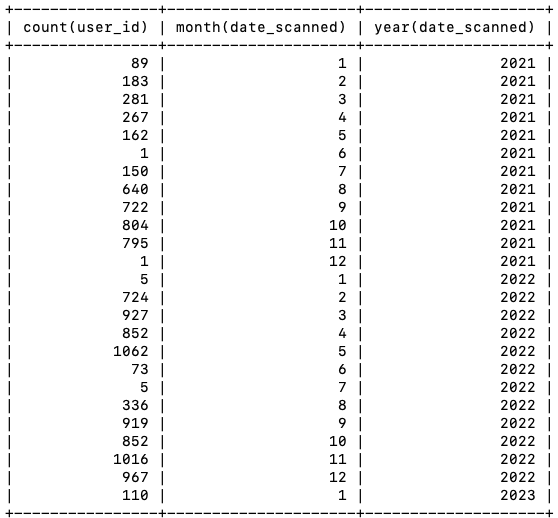

## 3. Note to Stakeholder

Hey there,

Hope you are doing well. I want share few points which might needs to modify. so that datasets looks more beautiful

1. lots of null values in given tables. for instance if we need to fetch brand from barcode from receipt items table, 
   its quite impossible task for few items.
2. DateTime format looks complex. it might be hard for non technical people to analyse the data.
3. in RELATED_BRAND_IDS column multiple values are packed in single cell. These values can be packed into new table.

I tried my best in limited time. i hope it might be helpful.

Thanks,
Hari